# Working with datetime in Pandas DataFrame

In [1]:
import pandas as pd
import numpy as np

### 1. Dates and Times in Python
Python's basic objects for working with dates and times reside in the built-in ``datetime`` module.
Along with the third-party ``dateutil`` module, you can use it to quickly perform a host of useful functionalities on dates and times.
For example, you can manually build a date using the ``datetime`` type:

In [2]:
from datetime import datetime
datetime(year = 2015, month = 7, day = 4)

datetime.datetime(2015, 7, 4, 0, 0)

Or, using the ``dateutil`` module, you can parse dates from a variety of string formats:

In [4]:
# https://dateutil.readthedocs.io/en/stable/parser.html#functions
from dateutil import parser
print(parser.parse("4th of July, 2015"))
print(parser.parse("07/04/2015"))
print(parser.parse("07/04/2015", dayfirst=True))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-04-07 00:00:00


In [5]:
print(parser.parse("7/4/2015"))
print(parser.parse("07-04-2015"))
print(parser.parse("2015-07-04"))

2015-07-04 00:00:00
2015-07-04 00:00:00
2015-07-04 00:00:00


Once you have a ``datetime`` object, you can do things like printing the day of the week:

In [6]:
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
datetime(year = 2015, month = 7, day = 4).strftime('%A')

'Saturday'

### 2. Dates and Times in numpy

In [7]:
import numpy as np
date = np.array('2015-07-04', dtype = np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [8]:
np.array('07-04-2015', dtype = np.datetime64)

ValueError: Cannot create a NumPy datetime other than NaT with generic units

Once we have this date formatted, however, we can quickly do vectorized operations on it:

In [9]:
date

array('2015-07-04', dtype='datetime64[D]')

In [10]:
np.arange(14)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [11]:
date

array('2015-07-04', dtype='datetime64[D]')

In [12]:
dates = date + np.arange(12)
dates

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [13]:
dates[0]

np.datetime64('2015-07-04')

Here is a minute-based datetime:

In [14]:
np.datetime64('2015-07-04 12:00:30')

np.datetime64('2015-07-04T12:00:30')

Notice that the time zone is automatically set to the local time on the computer executing the code.
You can force any desired fundamental unit using one of many format codes; for example, here we'll force a nanosecond-based time.

The following table, drawn from the [NumPy datetime64 documentation](http://docs.scipy.org/doc/numpy/reference/arrays.datetime.html), lists the available format codes along with the relative and absolute timespans that they can encode:

|Code    | Meaning     | Time span (relative) | Time span (absolute)   |
|--------|-------------|----------------------|------------------------|
| ``Y``  | Year	       | ± 9.2e18 years       | [9.2e18 BC, 9.2e18 AD] |
| ``M``  | Month       | ± 7.6e17 years       | [7.6e17 BC, 7.6e17 AD] |
| ``W``  | Week	       | ± 1.7e17 years       | [1.7e17 BC, 1.7e17 AD] |
| ``D``  | Day         | ± 2.5e16 years       | [2.5e16 BC, 2.5e16 AD] |
| ``h``  | Hour        | ± 1.0e15 years       | [1.0e15 BC, 1.0e15 AD] |
| ``m``  | Minute      | ± 1.7e13 years       | [1.7e13 BC, 1.7e13 AD] |
| ``s``  | Second      | ± 2.9e12 years       | [ 2.9e9 BC, 2.9e9 AD]  |
| ``ms`` | Millisecond | ± 2.9e9 years        | [ 2.9e6 BC, 2.9e6 AD]  |
| ``us`` | Microsecond | ± 2.9e6 years        | [290301 BC, 294241 AD] |
| ``ns`` | Nanosecond  | ± 292 years          | [ 1678 AD, 2262 AD]    |
| ``ps`` | Picosecond  | ± 106 days           | [ 1969 AD, 1970 AD]    |
| ``fs`` | Femtosecond | ± 2.6 hours          | [ 1969 AD, 1970 AD]    |
| ``as`` | Attosecond  | ± 9.2 seconds        | [ 1969 AD, 1970 AD]    |

### 3. Dates and Times in Pandas

#### Default arguments

In [15]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})
df

,date,value
0,3/10/2000,2
1,3/11/2000,3
2,3/12/2000,4


In [16]:
df.dtypes

date     object
value     int64
dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date']) # dayfirst = False
df

,date,value
0,2000-03-10,2
1,2000-03-11,3
2,2000-03-12,4


In [18]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

#### Day first format

In [18]:
df = pd.DataFrame({'date': ['3/10/2000', '3/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df

,date,value
0,2000-10-03,2
1,2000-11-03,3
2,2000-12-03,4


#### Custom format 

In [20]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S")
df

,date,value
0,2016-06-10 20:30:00,2
1,2016-07-01 19:45:30,3
2,2013-10-12 04:05:01,4


#### Handle parsing error

In [21]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'])

ValueError: time data "a/11/2000" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'ignore')
df.dtypes
df

C:\Users\hegoi\AppData\Local\Temp\ipykernel_18388\1808340823.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df['date'] = pd.to_datetime(df['date'], errors = 'ignore')


,date,value
0,3/10/2000,2
1,a/11/2000,3
2,3/12/2000,4


In [ ]:
df = pd.DataFrame({'date': ['3/10/2000', 'a/11/2000', '3/12/2000'],
                   'value': [2, 3, 4]})

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df

,date,value
0,2000-03-10,2
1,NaT,3
2,2000-03-12,4


In [ ]:
df[df['date'].isnull()]

,date,value
1,NaT,3


In [ ]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

### 4. Assemble a datetime from multiple columns

In [22]:
df = pd.DataFrame({'year': [2015, 2016],
                   'month': [2, 3],
                   'day': [4, 5]})

df

,year,month,day
0,2015,2,4
1,2016,3,5


In [23]:
df.dtypes

year     int64
month    int64
day      int64
dtype: object

In [24]:
df['date'] = pd.to_datetime(df)

In [25]:
df

,year,month,day,date
0,2015,2,4,2015-02-04
1,2016,3,5,2016-03-05


In [26]:
df.dtypes

year              int64
month             int64
day               int64
date     datetime64[ns]
dtype: object

### 5. Get year, month and day

In [27]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [28]:
df.dtypes

name            object
DoB     datetime64[ns]
dtype: object

In [23]:
df['year'] = df['DoB'].dt.year
df['month'] = df['DoB'].dt.month
df['day'] = df['DoB'].dt.day
df

,name,DoB,year,month,day
0,Tom,1997-08-05,1997,8,5
1,Andy,1996-04-28,1996,4,28
2,Lucas,1995-12-16,1995,12,16


In [24]:
df.dtypes

name             object
DoB      datetime64[ns]
year              int32
month             int32
day               int32
dtype: object

### 6. Get the week of year, the day of week and leap year

In [29]:
df['week_of_year'] = df['DoB'].dt.isocalendar().week
df['day_of_week'] = df['DoB'].dt.dayofweek
df['is_leap_year'] = df['DoB'].dt.is_leap_year
df

,name,DoB,week_of_year,day_of_week,is_leap_year
0,Tom,1997-08-05,32,1,False
1,Andy,1996-04-28,17,6,True
2,Lucas,1995-12-16,50,5,False


In [27]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 
df['day_of_week_name']=df['DoB'].dt.weekday.map(dw_mapping)
df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday


### 7. Get the age from the date of birth

In [30]:
pd.to_datetime('today')

Timestamp('2025-03-28 09:18:27.332410')

In [31]:
datetime.today()

datetime.datetime(2025, 3, 28, 9, 18, 45, 120301)

In [28]:
today = pd.to_datetime('today')
df['age'] = (today - df['DoB']).dt.days//365.25

df

,name,DoB,year,month,day,week_of_year,day_of_week,is_leap_year,day_of_week_name,age
0,Tom,1997-08-05,1997,8,5,32,1,False,Tuesday,27.0
1,Andy,1996-04-28,1996,4,28,17,6,True,Sunday,28.0
2,Lucas,1995-12-16,1995,12,16,50,5,False,Saturday,29.0


### 8. Improve performance by setting date column as the index 

In [29]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df

,date,num,city
0,2015-01-01 09:00:00,4,London
1,2015-01-01 09:01:00,4,London
2,2015-01-01 09:02:00,3,London
3,2015-01-01 09:03:00,3,London
4,2015-01-01 09:04:00,3,London
...,...,...,...
1795139,2019-01-31 15:56:00,3,Cambridge
1795140,2019-01-31 15:57:00,3,Cambridge
1795141,2019-01-31 15:58:00,3,Cambridge
1795142,2019-01-31 15:59:00,3,Cambridge


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795144 entries, 0 to 1795143
Data columns (total 3 columns):
 #   Column  Dtype         
---  ------  -----         
 0   date    datetime64[ns]
 1   num     int64         
 2   city    object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 41.1+ MB


In [31]:
df.describe(include='all')

,date,num,city
count,1795144,1.795144e+06,1795144
unique,NaN,NaN,4
top,NaN,NaN,London
freq,NaN,NaN,448786
mean,2017-01-16 10:05:27.579737344,2.801503e+00,NaN
min,2015-01-01 09:00:00,1.000000e+00,NaN
25%,2016-01-08 12:30:00,2.000000e+00,NaN
50%,2017-01-17 00:30:00,3.000000e+00,NaN
75%,2018-01-24 12:30:00,3.000000e+00,NaN
max,2019-01-31 16:00:00,4.000000e+00,NaN


In [32]:
df.dtypes

date    datetime64[ns]
num              int64
city            object
dtype: object

In [32]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'])
df.set_index(['date'], inplace=True)
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [33]:
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [34]:
df = pd.read_csv('data/city_sales.csv', parse_dates = ['date'], index_col = 'date')
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [36]:
# Tenemos un DateTimeIndex
df.index

DatetimeIndex(['2015-01-01 09:00:00', '2015-01-01 09:01:00',
               '2015-01-01 09:02:00', '2015-01-01 09:03:00',
               '2015-01-01 09:04:00', '2015-01-01 09:05:00',
               '2015-01-01 09:06:00', '2015-01-01 09:07:00',
               '2015-01-01 09:08:00', '2015-01-01 09:09:00',
               ...
               '2019-01-31 15:51:00', '2019-01-31 15:52:00',
               '2019-01-31 15:53:00', '2019-01-31 15:54:00',
               '2019-01-31 15:55:00', '2019-01-31 15:56:00',
               '2019-01-31 15:57:00', '2019-01-31 15:58:00',
               '2019-01-31 15:59:00', '2019-01-31 16:00:00'],
              dtype='datetime64[ns]', name='date', length=1795144, freq=None)

In [35]:
from datetime import datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

### 9. Select data with a specific year and perform aggregation

In [36]:
df.loc['2018']

,num,city
date,,
2018-01-01 09:00:00,2,London
2018-01-01 09:01:00,1,London
2018-01-01 09:02:00,3,London
2018-01-01 09:03:00,3,London
2018-01-01 09:04:00,3,London
...,...,...
2018-12-31 15:56:00,4,Cambridge
2018-12-31 15:57:00,2,Cambridge
2018-12-31 15:58:00,3,Cambridge


In [39]:
df.loc['2018', 'num'].head()

date
2018-01-01 09:00:00    2
2018-01-01 09:01:00    1
2018-01-01 09:02:00    3
2018-01-01 09:03:00    3
2018-01-01 09:04:00    3
Name: num, dtype: int64

In [37]:
df.loc['2018'].groupby('city').sum()

,num
city,
Cambridge,308428
Durham,307965
London,307431
Oxford,307366


### 10. Select data with a specific month or a specific day of the month

In [38]:
df.loc['2018-5'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [39]:
df.loc['2018-5-1'].head()

,num,city
date,,
2018-05-01 09:00:00,1,London
2018-05-01 09:01:00,4,London
2018-05-01 09:02:00,3,London
2018-05-01 09:03:00,2,London
2018-05-01 09:04:00,3,London


In [40]:
cond = df.index.month == 2
df[cond].head()

,num,city
date,,
2015-02-02 09:00:00,4,London
2015-02-02 09:01:00,3,London
2015-02-02 09:02:00,3,London
2015-02-02 09:03:00,2,London
2015-02-02 09:04:00,1,London


### 11. Select data between two dates (deprecated)

In [41]:
df['2016':'2018']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [42]:
df.sort_index(inplace=True)

In [43]:
df['2016':'2018']

,num,city
date,,
2016-01-01 09:00:00,3,Cambridge
2016-01-01 09:00:00,4,London
2016-01-01 09:00:00,3,Durham
2016-01-01 09:00:00,3,Oxford
2016-01-01 09:01:00,2,Oxford
...,...,...
2018-12-31 15:59:00,2,Oxford
2018-12-31 16:00:00,2,Durham
2018-12-31 16:00:00,3,Oxford


In [44]:
df_2016_2018 = df.loc['2016-01-01':'2018-12-31']

In [45]:
df.loc['2018-5-2 10' : '2018-5-2 11' ]

,num,city
date,,
2018-05-02 10:00:00,3,Cambridge
2018-05-02 10:00:00,3,Oxford
2018-05-02 10:00:00,3,Durham
2018-05-02 10:00:00,2,London
2018-05-02 10:01:00,3,London
...,...,...
2018-05-02 11:58:00,4,Cambridge
2018-05-02 11:59:00,3,Durham
2018-05-02 11:59:00,1,Cambridge


In [46]:
df.loc['2018-5-2 10:30' : '2018-5-2 10:45' ]

,num,city
date,,
2018-05-02 10:30:00,3,London
2018-05-02 10:30:00,3,Oxford
2018-05-02 10:30:00,2,Durham
2018-05-02 10:30:00,3,Cambridge
2018-05-02 10:31:00,2,Durham
...,...,...
2018-05-02 10:44:00,3,Cambridge
2018-05-02 10:45:00,4,London
2018-05-02 10:45:00,3,Durham


In [52]:
df.between_time('10:30','10:45')

,num,city
date,,
2015-01-01 10:30:00,4,London
2015-01-01 10:30:00,4,Cambridge
2015-01-01 10:30:00,4,Oxford
2015-01-01 10:30:00,2,Durham
2015-01-01 10:31:00,3,London
...,...,...
2019-01-31 10:44:00,2,London
2019-01-31 10:45:00,4,London
2019-01-31 10:45:00,4,Cambridge


In [53]:
df.shape

(1795144, 2)

### 12. Operations with dates

In [47]:
df = pd.DataFrame({'name': ['Tom', 'Andy', 'Lucas'],
                 'DoB': ['08-05-1997', '04-28-1996', '12-16-1995']})

df['DoB'] = pd.to_datetime(df['DoB'])
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [48]:
df.dtypes


name            object
DoB     datetime64[ns]
dtype: object

In [50]:
df

,name,DoB
0,Tom,1997-08-05
1,Andy,1996-04-28
2,Lucas,1995-12-16


In [49]:
from pandas.tseries.offsets import DateOffset, BDay

print(df['DoB'] + DateOffset(days = 5))
print()
print(df['DoB'] + DateOffset(days = -5))
print()
print(df['DoB'] + DateOffset(months = 5))

0   1997-08-10
1   1996-05-03
2   1995-12-21
Name: DoB, dtype: datetime64[ns]

0   1997-07-31
1   1996-04-23
2   1995-12-11
Name: DoB, dtype: datetime64[ns]

0   1998-01-05
1   1996-09-28
2   1996-05-16
Name: DoB, dtype: datetime64[ns]


In [52]:
BDay(10)

<10 * BusinessDays>

In [53]:
print(df['DoB'])
print(df['DoB'] + BDay(10))

0   1997-08-05
1   1996-04-28
2   1995-12-16
Name: DoB, dtype: datetime64[ns]
0   1997-08-19
1   1996-05-10
2   1995-12-29
Name: DoB, dtype: datetime64[ns]


In [55]:
df['DoB+10BD'] = df['DoB'] + BDay(10)
df

,name,DoB,DoB+10BD
0,Tom,1997-08-05,1997-08-19
1,Andy,1996-04-28,1996-05-10
2,Lucas,1995-12-16,1995-12-29


In [57]:
df['date_diff'] = (df['DoB+10BD'] - df['DoB']).dt.days
df

,name,DoB,DoB+10BD,date_diff
0,Tom,1997-08-05,1997-08-19,14
1,Andy,1996-04-28,1996-05-10,12
2,Lucas,1995-12-16,1995-12-29,13


In [58]:
df.dtypes

name                 object
DoB          datetime64[ns]
DoB+10BD     datetime64[ns]
date_diff             int64
dtype: object

### 13. Regular sequences: ``pd.date_range()``

To make the creation of **regular date** sequences more convenient, Pandas offers a few functions for this purpose: ``pd.date_range()`` for timestamps, ``pd.period_range()`` for periods, and ``pd.timedelta_range()`` for time deltas.
We've seen that **Python's ``range()`` and NumPy's ``np.arange()``** turn a startpoint, endpoint, and optional stepsize into a sequence.
Similarly, ``pd.date_range()`` accepts a start date, an end date, and an optional frequency code to create a regular sequence of dates.
By default, the frequency is one day:

In [59]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

Alternatively, the date range can be specified not with a start and endpoint, but with a startpoint and a number of periods:

In [60]:
pd.date_range('2015-07-03', periods = 8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

The spacing can be modified by altering the ``freq`` argument, which defaults to ``D``.
For example, here we will construct a range of hourly timestamps:

In [61]:
pd.date_range('2015-01-01', periods = 12, freq='M')

C:\Users\hegoi\AppData\Local\Temp\ipykernel_10060\4038462630.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range('2015-01-01', periods = 12, freq='M')


DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31', '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='ME')

### 14. Handle missing values

In [62]:
# Creamos algunos missings aposta con la rolling window
df = pd.read_csv('data/city_sales.csv', parse_dates=['date'], index_col='date')
df

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London
...,...,...
2019-01-31 15:56:00,3,Cambridge
2019-01-31 15:57:00,3,Cambridge
2019-01-31 15:58:00,3,Cambridge


In [63]:
df.head()

,num,city
date,,
2015-01-01 09:00:00,4,London
2015-01-01 09:01:00,4,London
2015-01-01 09:02:00,3,London
2015-01-01 09:03:00,3,London
2015-01-01 09:04:00,3,London


In [67]:
df['rolling_mean'] = df["num"].rolling(3).mean()
df.head(25)

,num,city,rolling_mean
date,,,
2015-01-01 09:00:00,4,London,NaN
2015-01-01 09:01:00,4,London,NaN
2015-01-01 09:02:00,3,London,3.666667
2015-01-01 09:03:00,3,London,3.333333
2015-01-01 09:04:00,3,London,3.000000
2015-01-01 09:05:00,3,London,3.000000
2015-01-01 09:06:00,3,London,3.000000
2015-01-01 09:07:00,2,London,2.666667
2015-01-01 09:08:00,3,London,2.666667


In [69]:
df['rolling_mean_back'] = df['rolling_mean'].fillna(method = 'backfill')
df.head()

C:\Users\hegoi\AppData\Local\Temp\ipykernel_10060\150125841.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['rolling_mean_back'] = df['rolling_mean'].fillna(method = 'backfill')


,num,city,rolling_mean,rolling_mean_back
date,,,,
2015-01-01 09:00:00,4,London,NaN,3.666667
2015-01-01 09:01:00,4,London,NaN,3.666667
2015-01-01 09:02:00,3,London,3.666667,3.666667
2015-01-01 09:03:00,3,London,3.333333,3.333333
2015-01-01 09:04:00,3,London,3.000000,3.000000


In [70]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
  
# Print the dataframe
df

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [69]:
df.interpolate(method = 'linear')

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


### 15. Resampling, Windowing and Shifting

In [72]:
goog = pd.read_csv('data/GOOG.csv')
goog['Date'] =  pd.to_datetime(goog['Date'])
goog.set_index('Date', inplace=True)
goog



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


In [73]:
goog.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
2010-01-11,301.101410,301.101410,295.910858,299.432648,299.432648,14479800
2010-01-12,297.709106,297.963165,292.902130,294.137512,294.137512,9742900
2010-01-13,287.168610,293.091431,285.878448,292.448822,292.448822,13041800
2010-01-14,290.859772,295.990540,290.316833,293.823669,293.823669,8511900


In [74]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-01-04 to 2020-01-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


In [72]:
# goog = goog['Close']
goog = goog.fillna(method='ffill')
goog

C:\Users\hegoi\AppData\Local\Temp\ipykernel_1664\862946215.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  goog = goog.fillna(method='ffill')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900
...,...,...,...,...,...,...
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.890015,1038400
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.140015,1050900
2019-12-31,1330.109985,1338.000000,1329.084961,1337.020020,1337.020020,961800


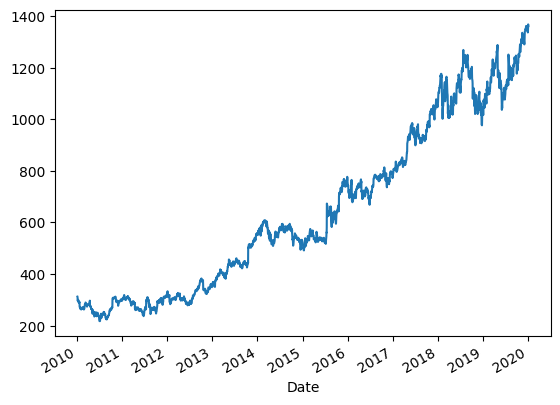

In [74]:
goog['Close'].plot();

In [75]:
goog.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2019-12-19', '2019-12-20', '2019-12-23', '2019-12-24',
               '2019-12-26', '2019-12-27', '2019-12-30', '2019-12-31',
               '2020-01-02', '2020-01-03'],
              dtype='datetime64[ns]', name='Date', length=2518, freq=None)

### resample() y asfreq()
.resample(): Groups data by the specified frequency and applies an aggregation function.
.asfreq(): Changes the index frequency without grouping or aggregating, inserting NaN where data is missing.

In [75]:
goog.resample('BYE').mean() # BA: business year end

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,267.154630,269.464070,264.402920,266.811472,266.811472,6.383553e+06
2011-12-30,283.523139,286.110425,280.751839,283.424738,283.424738,6.179412e+06
2012-12-31,320.195071,322.927847,317.288286,320.208021,320.208021,5.228172e+06
2013-12-31,440.160271,443.407307,437.217431,440.470378,440.470378,4.190346e+06
2014-12-31,560.709645,564.495206,555.162255,559.803290,559.803290,2.487038e+06
2015-12-31,602.057314,607.442765,596.090603,602.005681,602.005681,2.069434e+06
2016-12-30,743.732459,749.421629,737.597905,743.486707,743.486707,1.832266e+06
2017-12-29,921.121193,926.898963,915.331412,921.780837,921.780837,1.476514e+06
2018-12-31,1113.554101,1125.777606,1101.001658,1113.225134,1113.225134,1.741965e+06


<Axes: xlabel='Date'>

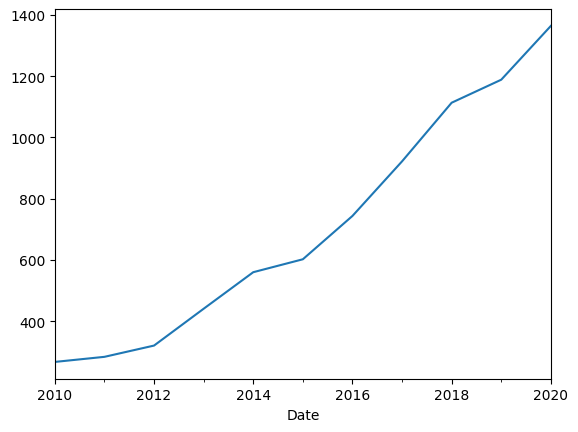

In [76]:
goog.resample('BYE').mean()["Close"].plot()

In [76]:
goog.asfreq('BYE')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


<Axes: xlabel='Date'>

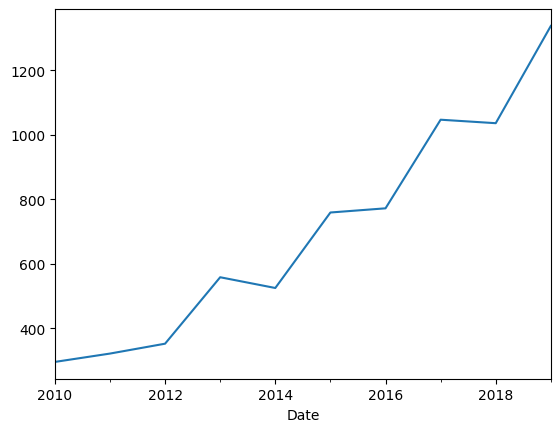

In [77]:
goog.asfreq('BYE')["Close"].plot()

In [80]:
goog.asfreq('BYE')["Close"].index

DatetimeIndex(['2010-12-31', '2011-12-30', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-30', '2017-12-29',
               '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='Date', freq='BYE-DEC')

In [78]:
goog.loc['2012-12-31']

Open         3.486930e+02
High         3.539583e+02
Low          3.467005e+02
Close        3.523692e+02
Adj Close    3.523692e+02
Volume       4.009600e+06
Name: 2012-12-31 00:00:00, dtype: float64

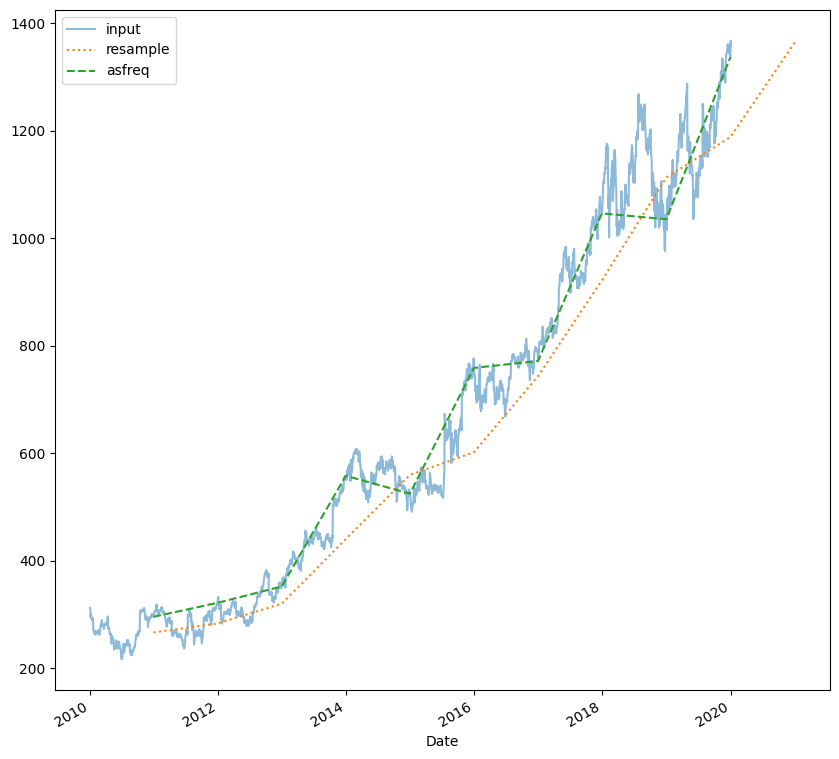

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
goog['Close'].plot(alpha=0.5, style='-')
goog['Close'].resample('BYE').mean().plot(style=':')
goog['Close'].asfreq('BYE').plot(style='--');

plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

In [85]:
goog.asfreq('BYE')

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090000
2011-12-30,319.811279,322.172424,319.811279,321.744019,321.744019,3577800
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009600
2013-12-31,554.043335,558.406982,551.064453,558.262512,558.262512,2725900
2014-12-31,529.795471,531.141724,524.360352,524.958740,524.958740,1368200
2015-12-31,769.500000,769.500000,758.340027,758.880005,758.880005,1500900
2016-12-30,782.750000,782.780029,770.409973,771.820007,771.820007,1770000
2017-12-29,1046.719971,1049.699951,1044.900024,1046.400024,1046.400024,887500
2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


| Code   | Description         | Code   | Description          |
|--------|---------------------|--------|----------------------|
| ``D``  | Calendar day        | ``B``  | Business day         |
| ``W``  | Weekly              |        |                      |
| ``M``  | Month end           | ``BM`` | Business month end   |
| ``Q``  | Quarter end         | ``BQ`` | Business quarter end |
| ``A``  | Year end            | ``BA`` | Business year end    |
| ``H``  | Hours               | ``BH`` | Business hours       |
| ``T``  | Minutes             |        |                      |
| ``S``  | Seconds             |        |                      |
| ``L``  | Milliseonds         |        |                      |
| ``U``  | Microseconds        |        |                      |
| ``N``  | nanoseconds         |        |                      |

In [80]:
goog = goog['Close']

### shift() 


In [81]:
goog_shift = pd.DataFrame({'Data': goog,
             'Data-7': goog.shift(7),
             'Diff': goog - goog.shift(7),
             '%Crec': round(((goog - goog.shift(7))/goog)*100,2)})

In [82]:
goog_shift.head(20)

,Data,Data-7,Diff,%Crec
Date,,,,
2010-01-04,312.204773,NaN,NaN,NaN
2010-01-05,310.829926,NaN,NaN,NaN
2010-01-06,302.994293,NaN,NaN,NaN
2010-01-07,295.940735,NaN,NaN,NaN
2010-01-08,299.885956,NaN,NaN,NaN
2010-01-11,299.432648,NaN,NaN,NaN
2010-01-12,294.137512,NaN,NaN,NaN
2010-01-13,292.448822,312.204773,-19.755951,-6.76
2010-01-14,293.823669,310.829926,-17.006257,-5.79


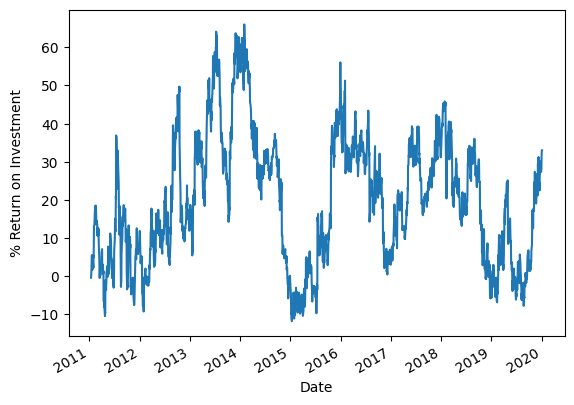

In [84]:
# Calcular el ROI de la inversión
import matplotlib.pyplot as plt
ROI = 100 * (goog - goog.shift(261)) / goog.shift(261)
ROI.plot()
plt.ylabel('% Return on Investment');

### 16. Rolling window

In [85]:
rolling = goog.rolling(261) # 365 - weekends (aprox(52*2))

In [86]:
365 - 52* 2

261

In [87]:
rolling

Rolling [window=261,center=False,axis=0,method=single]

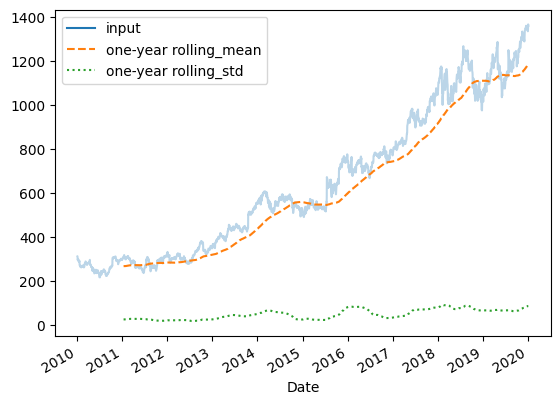

In [89]:
rolling = goog.rolling(261,center=False)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)